In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']= True

### DATA INGESTION

#### 1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [3]:
##read the data

In [4]:
data = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [6]:
##Summary data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


###Preliminary comments : 
- 8 numerical variables with discrete variables
- 2 categorical variables

In [7]:
##Dropping unnecessary columns

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
##Rename columns

In [10]:
data.rename(columns={'economic.cond.national':'Economic_cond_national',
                     'economic.cond.household':'Economic_cond_household',
                     'political.knowledge':'Political_knowledge'},inplace=True)

In [11]:
data.columns

Index(['vote', 'age', 'Economic_cond_national', 'Economic_cond_household',
       'Blair', 'Hague', 'Europe', 'Political_knowledge', 'gender'],
      dtype='object')

In [12]:
data.head()

,vote,age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [13]:
data.tail()

,vote,age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [14]:
data.shape 

(1525, 9)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
Economic_cond_national     1525 non-null int64
Economic_cond_household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
Political_knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [16]:
#Checking null values

In [17]:
data.isnull().sum()

vote                       0
age                        0
Economic_cond_national     0
Economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
Political_knowledge        0
gender                     0
dtype: int64

Comments :  There  are no null values in the data

In [18]:
#checking duplicates rows
data.duplicated().sum()

8

In [19]:
#list duplicate rows
data[data.duplicated(keep=False)]

,vote,age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,gender
2,Labour,35,4,4,5,2,3,2,male
67,Labour,35,4,4,5,2,3,2,male
86,Conservative,53,3,4,2,2,6,0,female
333,Labour,38,2,4,2,2,4,3,male
390,Labour,39,3,4,4,2,5,2,male
577,Conservative,74,4,3,2,4,8,2,female
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
916,Labour,29,4,4,4,2,2,2,female
983,Conservative,74,4,3,2,4,8,2,female


Comments :  the duplicates are genuine ones as we are in context of election. we can have random case of similar behaviour. We decide to keep them

In [20]:
#changing data type for statistics
data.Economic_cond_national = data.Economic_cond_national.astype('object')
data.Economic_cond_household = data.Economic_cond_household.astype('object')
data.Blair = data.Blair.astype('object')
data.Hague = data.Hague.astype('object')
data.Europe = data.Europe.astype('object')
data.Political_knowledge = data.Political_knowledge.astype('object')

##

In [21]:
data.describe(include='all').round(2)

,vote,age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,gender
count,1525,1525.00,1525.0,1525.0,1525.0,1525.0,1525.0,1525.0,1525
unique,2,NaN,5.0,5.0,5.0,5.0,11.0,4.0,2
top,Labour,NaN,3.0,3.0,4.0,2.0,11.0,2.0,female
freq,1063,NaN,607.0,648.0,836.0,624.0,338.0,782.0,812
mean,NaN,54.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,15.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,41.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,67.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Check the data size
data.shape

(1525, 9)

In [23]:
data.reset_index(drop=True,inplace=True)

In [24]:
data.tail()

,vote,age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


#### 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [25]:
cat_cols = ['vote','gender']
num_cols = ['Economic_cond_household','Economic_cond_national','Blair','Hague','Europe','Political_knowledge']

###### Univariate Analysis Categorical variables

VOTE
The distribution for the variable: 
-------------------------------------------------------------------------------
Labour          0.7
Conservative    0.3
Name: vote, dtype: float64
-------------------------------------------------------------------------------


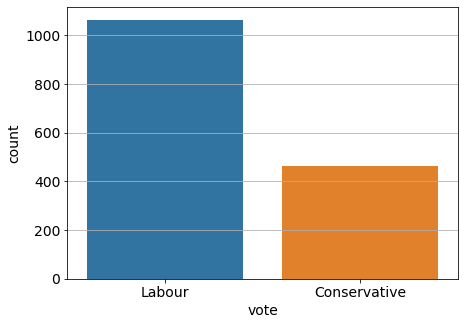

GENDER
The distribution for the variable: 
-------------------------------------------------------------------------------
female    0.53
male      0.47
Name: gender, dtype: float64
-------------------------------------------------------------------------------


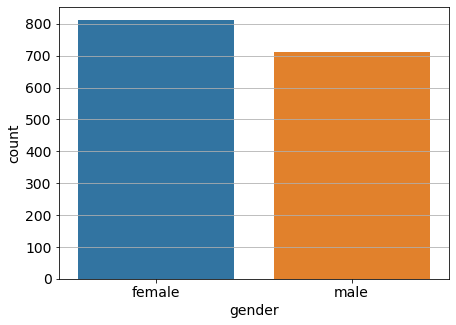

In [26]:
for col in cat_cols:
    print(col.upper())
    print('The distribution for the variable: ')
    print ("-------------------------------------------------------------------------------")
    print(data[col].value_counts(normalize=True).round(2))
    print ("-------------------------------------------------------------------------------")
    sns.countplot(data[col])
    plt.show()

###### Univariate Analysis Numerical variables

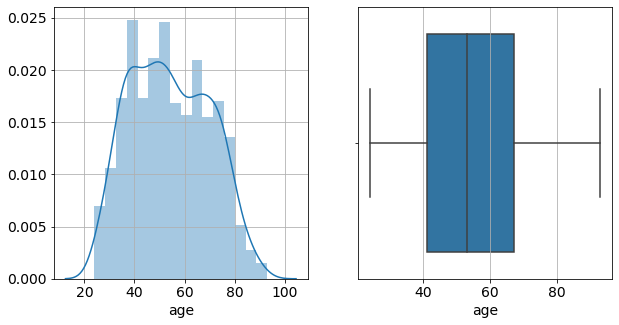

In [27]:
#Age distribution
fig, ax =plt.subplots(1,2,figsize=(10, 5))

sns.distplot(data['age'], ax=ax[0])
sns.boxplot(data['age'], ax=ax[1])
fig.show()

ECONOMIC_COND_HOUSEHOLD
The distribution for the variable: 
-------------------------------------------------------------------------------
3    0.42
4    0.29
2    0.18
5    0.06
1    0.04
Name: Economic_cond_household, dtype: float64
-------------------------------------------------------------------------------


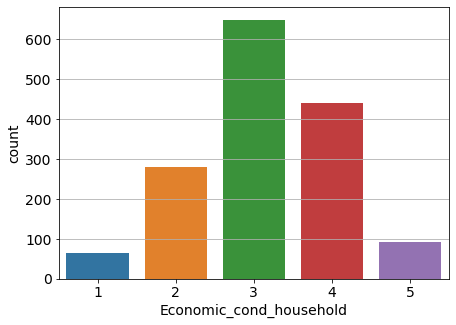

ECONOMIC_COND_NATIONAL
The distribution for the variable: 
-------------------------------------------------------------------------------
3    0.40
4    0.36
2    0.17
5    0.05
1    0.02
Name: Economic_cond_national, dtype: float64
-------------------------------------------------------------------------------


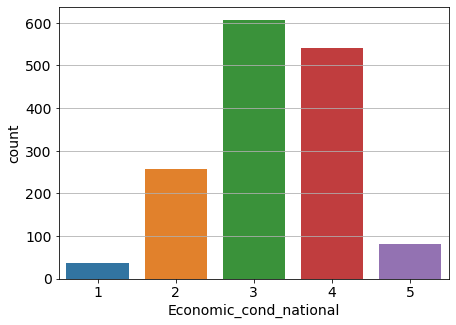

BLAIR
The distribution for the variable: 
-------------------------------------------------------------------------------
4    0.55
2    0.29
5    0.10
1    0.06
3    0.00
Name: Blair, dtype: float64
-------------------------------------------------------------------------------


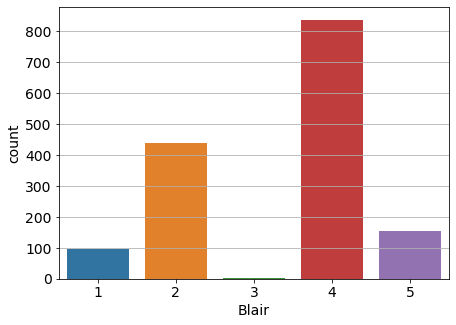

HAGUE
The distribution for the variable: 
-------------------------------------------------------------------------------
2    0.41
4    0.37
1    0.15
5    0.05
3    0.02
Name: Hague, dtype: float64
-------------------------------------------------------------------------------


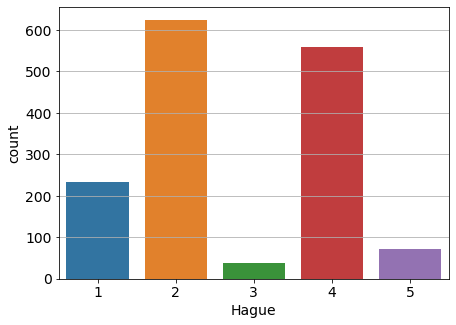

EUROPE
The distribution for the variable: 
-------------------------------------------------------------------------------
11    0.22
6     0.14
3     0.08
4     0.08
5     0.08
8     0.07
9     0.07
1     0.07
10    0.07
7     0.06
2     0.05
Name: Europe, dtype: float64
-------------------------------------------------------------------------------


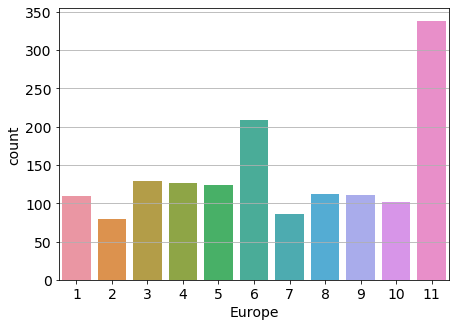

POLITICAL_KNOWLEDGE
The distribution for the variable: 
-------------------------------------------------------------------------------
2    0.51
0    0.30
3    0.16
1    0.02
Name: Political_knowledge, dtype: float64
-------------------------------------------------------------------------------


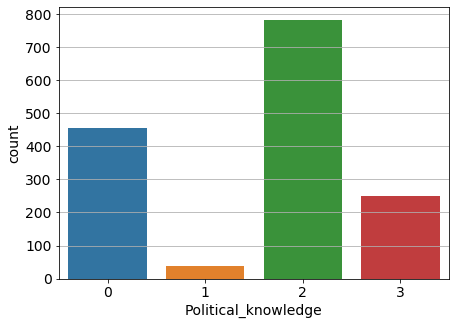

In [28]:
for col in num_cols:
    print(col.upper())
    print('The distribution for the variable: ')
    print ("-------------------------------------------------------------------------------")
    print(data[col].value_counts(normalize=True).round(2))
    print ("-------------------------------------------------------------------------------")
    sns.countplot(data[col])
    plt.show()

###### Bivariate Analysis

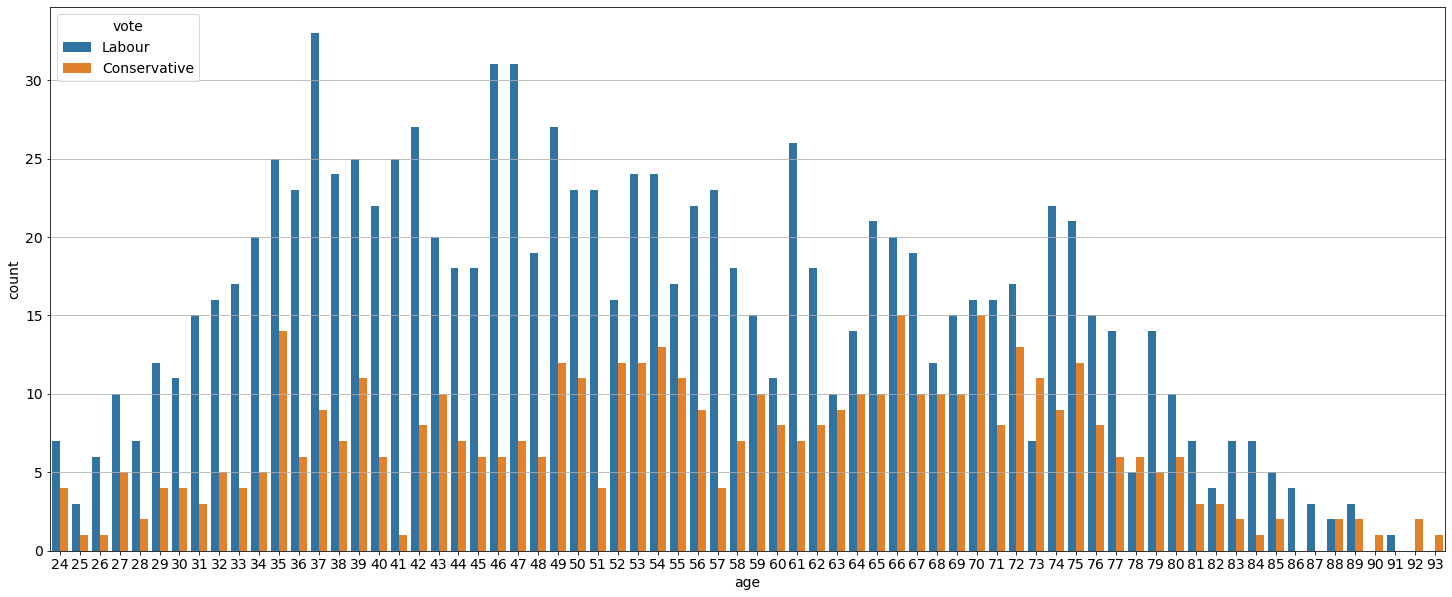

In [29]:
plt.figure(figsize=(25, 10))
sns.countplot(data['age'],hue=data['vote'])

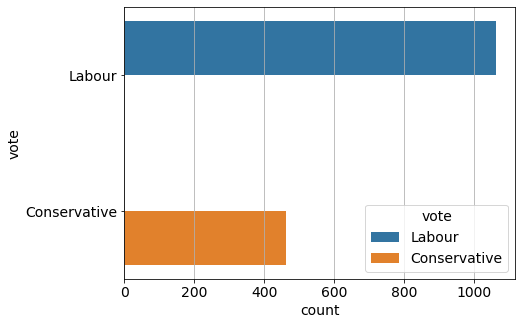

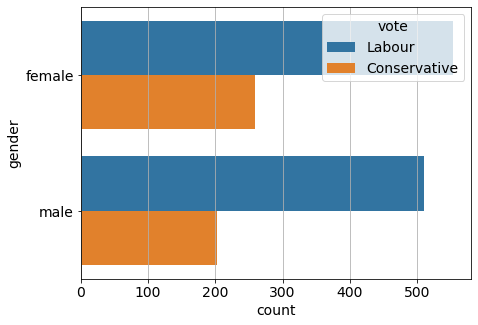

In [30]:
for col in cat_cols:
       sns.countplot(hue='vote',y = col,data= data)  
       plt.show()

###### for col in num_cols:
    sns.countplot(hue='vote',y = col,data= data)  
plt.show()

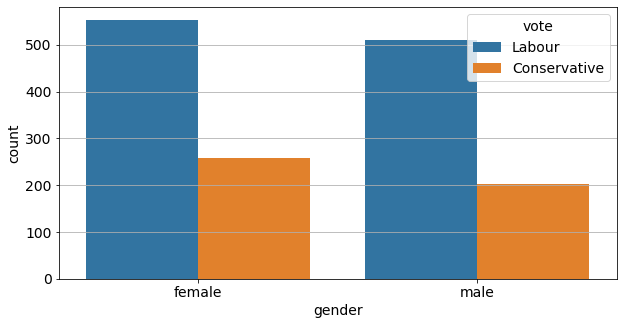

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data['gender'],hue=data['vote'])

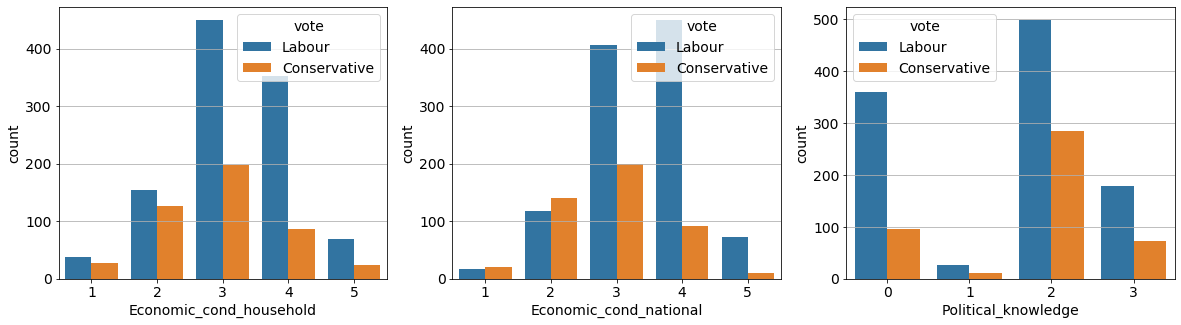

In [32]:
fig, ax =plt.subplots(1,3,figsize=(20, 5))
sns.countplot(data['Economic_cond_household'],hue=data['vote'],ax=ax[0])
sns.countplot(data['Economic_cond_national'],hue=data['vote'],ax=ax[1])
sns.countplot(data['Political_knowledge'],hue=data['vote'],ax=ax[2])

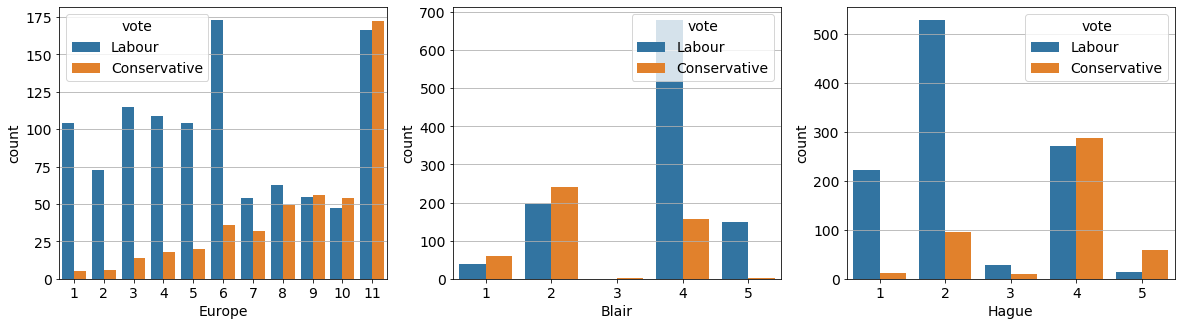

In [33]:
fig, ax =plt.subplots(1,3,figsize=(20, 5))
sns.countplot(data['Europe'],hue=data['vote'],ax=ax[0])
sns.countplot(data['Blair'],hue=data['vote'],ax=ax[1])
sns.countplot(data['Hague'],hue=data['vote'],ax=ax[2])

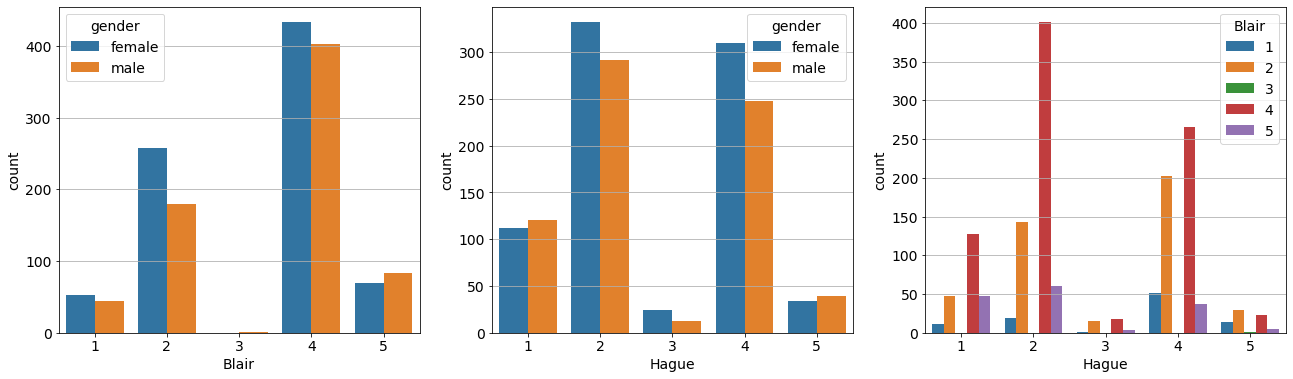

In [34]:
fig, ax =plt.subplots(1,3,figsize=(22, 6))
sns.countplot(data['Blair'],hue=data['gender'],ax=ax[0])
sns.countplot(data['Hague'],hue=data['gender'],ax=ax[1])
sns.countplot(data['Hague'],hue=data['Blair'],ax=ax[2])

###### Outlier Check

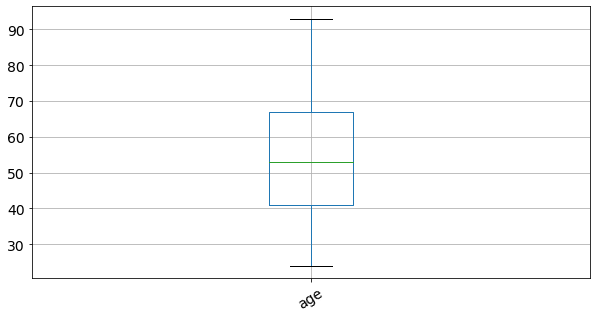

In [35]:
figure(figsize=(10, 5))
data.boxplot(rot = 32)

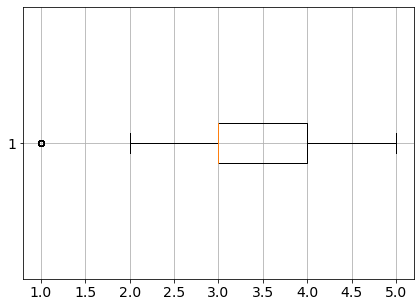

In [36]:
plt.boxplot(data['Economic_cond_household'], vert = False)
plt.show()

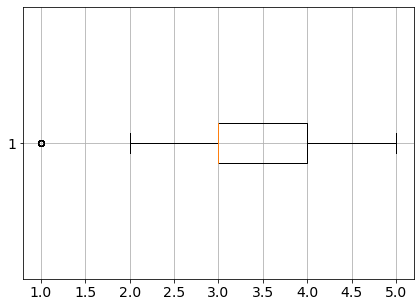

In [37]:
plt.boxplot(data['Economic_cond_national'], vert = False)
plt.show()

### DATA PREPARATION

#### 1. 3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

###### converting text to numbers   

In [38]:
df = data.copy()

In [39]:
le = LabelEncoder()
df['vote'] = le.fit_transform(df['vote'])
df['gender'] = le.fit_transform(df['gender'])

In [40]:
df.head()

,vote,age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


###### splitting  the dataset

In [41]:
X = df.drop('vote', axis=1)
y = df['vote']

In [42]:
data['vote'].value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10, stratify = y)

In [44]:
X_test.shape

(458, 8)

In [45]:
y_test.value_counts(normalize=True)

1    0.696507
0    0.303493
Name: vote, dtype: float64

In [46]:
X_train.shape

(1067, 8)

In [47]:
y_train.value_counts(normalize=True)

1    0.697282
0    0.302718
Name: vote, dtype: float64

###### Scaling of dataset

In [48]:
X_train.columns

Index(['age', 'Economic_cond_national', 'Economic_cond_household', 'Blair',
       'Hague', 'Europe', 'Political_knowledge', 'gender'],
      dtype='object')

In [49]:
num_cols = X_train.columns.to_list()

In [50]:
ss = StandardScaler()

In [51]:
X_train.loc[:, num_cols] = ss.fit_transform(X_train.loc[:, num_cols])
X_train.head()

,age,Economic_cond_national,Economic_cond_household,Blair,Hague,Europe,Political_knowledge,gender
1422,-0.569316,0.844627,0.928553,0.546201,-1.438902,0.372096,0.425319,-0.942600
338,0.768562,-1.411235,-0.147197,-1.998763,1.815594,1.284102,1.345838,1.060895
937,0.768562,1.972558,-0.147197,1.394523,-1.438902,-1.147914,0.425319,-0.942600
642,-1.078984,0.844627,0.928553,0.546201,1.001970,-1.147914,0.425319,1.060895
630,0.641145,0.844627,0.928553,0.546201,1.001970,-0.539910,0.425319,-0.942600


In [52]:
X_test.loc[:, num_cols] = ss.transform(X_test.loc[:, num_cols])

In [53]:
y_train.value_counts(normalize=True)

1    0.697282
0    0.302718
Name: vote, dtype: float64

In [54]:
y_test.value_counts(normalize=True)

1    0.696507
0    0.303493
Name: vote, dtype: float64

In [55]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### MODELLING

#### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [56]:
from sklearn.linear_model import  LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score,roc_auc_score,roc_curve
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### Logistic Regression model

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

## Predicting on Training and Test dataset
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

print("Acc Train:",metrics.accuracy_score(y_train, lr_train_pred))
print('Train F1: ', f1_score(y_train, lr_train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, lr_test_pred))
print('Test F1: ', f1_score(y_test, lr_test_pred))
print('Area Under Curve:',roc_auc_score(y_test, lr_test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, lr_test_pred)}')
print('\n')
print(classification_report(y_test, lr_test_pred))
print(classification_report(y_test, lr_test_pred))

Acc Train: 0.8350515463917526
Train F1:  0.8845144356955382
Acc Test: 0.8362445414847162
Test F1:  0.8868778280542987
Area Under Curve: 0.78095893191403
Confusion Matrix: 
[[ 89  50]
 [ 25 294]]


              precision    recall  f1-score   support

           0       0.78      0.64      0.70       139
           1       0.85      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.78      0.80       458
weighted avg       0.83      0.84      0.83       458

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       139
           1       0.85      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.78      0.80       458
weighted avg       0.83      0.84      0.83       458



In [58]:
lr_test_pred = lr.predict(X_test)

In [59]:
lr_score=get_metrics_score(lr)

Accuracy on training set :  0.8350515463917526
Accuracy on test set :  0.8362445414847162
Recall on training set :  0.9059139784946236
Recall on test set :  0.9216300940438872
Precision on training set :  0.8641025641025641
Precision on test set :  0.8546511627906976


In [60]:
## Getting the Predicted Classes and Probs
lr_test_predict = lr.predict(X_test)
lr_test_probabilities = lr.predict_proba(X_test)

In [61]:
lr_test_probabilities

array([[0.01626137, 0.98373863],
       [0.71902698, 0.28097302],
       [0.65381159, 0.34618841],
       [0.02978684, 0.97021316],
       [0.21305981, 0.78694019],
       [0.03338596, 0.96661404],
       [0.25152931, 0.74847069],
       [0.88560072, 0.11439928],
       [0.14671453, 0.85328547],
       [0.21543373, 0.78456627],
       [0.463155  , 0.536845  ],
       [0.0173487 , 0.9826513 ],
       [0.77114022, 0.22885978],
       [0.10614231, 0.89385769],
       [0.04526442, 0.95473558],
       [0.48562697, 0.51437303],
       [0.01790615, 0.98209385],
       [0.04761708, 0.95238292],
       [0.08953311, 0.91046689],
       [0.38003355, 0.61996645],
       [0.98274746, 0.01725254],
       [0.90626212, 0.09373788],
       [0.72154916, 0.27845084],
       [0.0102638 , 0.9897362 ],
       [0.77721546, 0.22278454],
       [0.01982477, 0.98017523],
       [0.3261121 , 0.6738879 ],
       [0.08654862, 0.91345138],
       [0.25484641, 0.74515359],
       [0.08855789, 0.91144211],
       [0.

### Handling class imbalance

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
sm = SMOTE( random_state = 1)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, y_train)

In [64]:
X_train_sm.shape

(1488, 8)

In [65]:
Y_train_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: vote, dtype: float64

In [66]:
#LR after SMOTE

In [67]:
lr = LogisticRegression()
lr.fit(X_train_sm, Y_train_sm)

train_pred = lr.predict(X_train_sm)
test_pred = lr.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, train_pred))
print('Train F1: ', f1_score(Y_train_sm, train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, test_pred))
print('Test F1: ', f1_score(y_test, test_pred))
print('Area Under Curve:',roc_auc_score(y_test, test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')
print('\n')
print(classification_report(y_test, test_pred))

Acc Train: 0.8266129032258065
Train F1:  0.8254397834912043
Acc Test: 0.8144104803493449
Test F1:  0.8631239935587761
Area Under Curve: 0.7977605376513837
Confusion Matrix: 
[[105  34]
 [ 51 268]]


              precision    recall  f1-score   support

           0       0.67      0.76      0.71       139
           1       0.89      0.84      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.82      0.81      0.82       458



In [68]:
lr_test_pred = lr.predict(X_test)

In [69]:
lr_score=get_metrics_score(lr)

Accuracy on training set :  0.8247422680412371
Accuracy on test set :  0.8144104803493449
Recall on training set :  0.8198924731182796
Recall on test set :  0.8401253918495298
Precision on training set :  0.9200603318250377
Precision on test set :  0.8874172185430463


In [70]:
## Getting the Predicted Classes and Probs
lr_test_predict = lr.predict(X_test)
lr_test_probabilities = lr.predict_proba(X_test)

# Linear Discrimination model

In [71]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

lda_train_pred = lda.predict(X_train)
lda_test_pred = lda.predict(X_test)

print("Acc Train:",metrics.accuracy_score(y_train, lda_train_pred))
print('Train F1: ', f1_score(y_train, lda_train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, lda_test_pred))
print('Test F1: ', f1_score(y_test, lda_test_pred))
print('Area Under Curve:',roc_auc_score(y_test, lda_test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, lda_test_pred)}')
print('\n')
print(classification_report(y_test, lda_test_pred))

Acc Train: 0.8331771321462043
Train F1:  0.8827404479578392
Acc Test: 0.8296943231441049
Test F1:  0.8814589665653495
Area Under Curve: 0.7782864617396992
Confusion Matrix: 
[[ 90  49]
 [ 29 290]]


              precision    recall  f1-score   support

           0       0.76      0.65      0.70       139
           1       0.86      0.91      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



In [72]:
lda_test_pred = lda.predict(X_test)

In [73]:
lda_score=get_metrics_score(lda)

Accuracy on training set :  0.8331771321462043
Accuracy on test set :  0.8296943231441049
Recall on training set :  0.9005376344086021
Recall on test set :  0.9090909090909091
Precision on training set :  0.8656330749354005
Precision on test set :  0.855457227138643


In [74]:
lda_test_predict = lda.predict(X_test)
lda_test_probabilities = lda.predict_proba(X_test)

In [75]:
#LDA after SMOTE

In [76]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sm, Y_train_sm)

lda_train_pred = lda.predict(X_train_sm)
lda_test_pred = lda.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, train_pred))
print('Train F1: ', f1_score(Y_train_sm, train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, test_pred))
print('Test F1: ', f1_score(y_test, test_pred))
print('Area Under Curve:',roc_auc_score(y_test, test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')
print('\n')
print(classification_report(y_test, test_pred))

Acc Train: 0.8266129032258065
Train F1:  0.8254397834912043
Acc Test: 0.8144104803493449
Test F1:  0.8631239935587761
Area Under Curve: 0.7977605376513837
Confusion Matrix: 
[[105  34]
 [ 51 268]]


              precision    recall  f1-score   support

           0       0.67      0.76      0.71       139
           1       0.89      0.84      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.82      0.81      0.82       458



In [77]:
lda_test_pred = lda.predict(X_test)

In [78]:
lda_score=get_metrics_score(lda)

Accuracy on training set :  0.823805060918463
Accuracy on test set :  0.8100436681222707
Recall on training set :  0.8185483870967742
Recall on test set :  0.8338557993730408
Precision on training set :  0.9199395770392749
Precision on test set :  0.8866666666666667


In [79]:
lda_test_predict = lda.predict(X_test)
lda_test_probabilities = lda.predict_proba(X_test)

### 1.5. Apply KNN Model and Naïve Bayes Model. Interpret the results. 

#### KNN model

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, Y_train_sm)

knn_train_pred = knn.predict(X_train_sm)
knn_test_pred = knn.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, train_pred))
print('Train F1: ', f1_score(Y_train_sm, train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, test_pred))
print('Test F1: ', f1_score(y_test, test_pred))
print('Area Under Curve:',roc_auc_score(y_test, test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')
print('\n')
print(classification_report(y_test, test_pred))

Acc Train: 0.8266129032258065
Train F1:  0.8254397834912043
Acc Test: 0.8144104803493449
Test F1:  0.8631239935587761
Area Under Curve: 0.7977605376513837
Confusion Matrix: 
[[105  34]
 [ 51 268]]


              precision    recall  f1-score   support

           0       0.67      0.76      0.71       139
           1       0.89      0.84      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.82      0.81      0.82       458



In [81]:
knn_test_pred = knn.predict(X_test)

In [82]:
knn.fit(X_train_sm, Y_train_sm)

KNeighborsClassifier()

In [83]:
knn_score=get_metrics_score(knn)

Accuracy on training set :  0.8547328959700093
Accuracy on test set :  0.7663755458515283
Recall on training set :  0.8279569892473119
Recall on test set :  0.7523510971786834
Precision on training set :  0.9580093312597201
Precision on test set :  0.8955223880597015


In [84]:
knn_test_predict = knn.predict(X_test)
knn_test_probabilities = knn.predict_proba(X_test)

#### Naive Bayes model

In [85]:
# creatw the model
nb = GaussianNB()
nb.fit(X_train_sm, Y_train_sm.ravel())

nb_train_pred = nb.predict(X_train_sm)
nb_test_pred = nb.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, nb_train_pred))
print('Train F1: ', f1_score(Y_train_sm, nb_train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, nb_test_pred))
print('Test F1: ', f1_score(y_test, nb_test_pred))
print('Area Under Curve:',roc_auc_score(y_test, nb_test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, nb_test_pred)}')
print('\n')
print(classification_report(y_test, nb_test_pred))

Acc Train: 0.8104838709677419
Train F1:  0.8099730458221025
Acc Test: 0.8231441048034934
Test F1:  0.8704
Area Under Curve: 0.8040301301278726
Confusion Matrix: 
[[105  34]
 [ 47 272]]


              precision    recall  f1-score   support

           0       0.69      0.76      0.72       139
           1       0.89      0.85      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.83      0.82      0.83       458



In [86]:
nb_test_pred = nb.predict(X_test)

In [87]:
nb.fit(X_train_sm, Y_train_sm.ravel())

GaussianNB()

In [88]:
nb_score=get_metrics_score(nb)

Accuracy on training set :  0.8097469540768509
Accuracy on test set :  0.8231441048034934
Recall on training set :  0.8077956989247311
Recall on test set :  0.8526645768025078
Precision on training set :  0.9092284417549168
Precision on test set :  0.8888888888888888


In [89]:
nb_test_predict = nb.predict(X_test)
nb_test_probabilities = nb.predict_proba(X_test)

## 3. Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

# Model Tuning

### a) Logistic regression

In [90]:
lr = LogisticRegression()
#define the model and parameters
parameters = {'penalty':['l1','l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.01],
              'tol':[0.1,0.01],
              'max_iter':[10,50,100]}

#Fit the model
lr_model= GridSearchCV(lr, param_grid=parameters)
lr_model.fit(X_train_sm,Y_train_sm)

#predictions on test data
prediction=lr_model.predict(X_test)

In [91]:
print(lr_model.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(lr_model.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(lr_model.best_estimator_)

0.8198969561385668
{'C': 0.01, 'max_iter': 50, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}
LogisticRegression(C=0.01, max_iter=50, solver='sag', tol=0.01)


In [142]:
lr_tuned = LogisticRegression(penalty='l2',solver='sag',C=0.01,tol=0.1,max_iter=50)
lr_tuned.fit(X_train_sm,Y_train_sm)

train_pred = lr_tuned.predict(X_train_sm)
test_pred = lr_tuned.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, train_pred))
print('Train F1: ', f1_score(Y_train_sm, train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, test_pred))
print('Test F1: ', f1_score(y_test, test_pred))
print('Area Under Curve:',roc_auc_score(y_test, test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')
print('\n')
print(classification_report(y_test, test_pred))

Acc Train: 0.823252688172043
Train F1:  0.8231338264963013
Acc Test: 0.8187772925764192
Test F1:  0.8676236044657097
Area Under Curve: 0.7968358855235562
Confusion Matrix: 
[[103  36]
 [ 47 272]]


              precision    recall  f1-score   support

           0       0.69      0.74      0.71       139
           1       0.88      0.85      0.87       319

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.82      0.82      0.82       458



In [143]:
lr_tuned_score=get_metrics_score(lr_tuned)

Accuracy on training set :  0.8256794751640113
Accuracy on test set :  0.8187772925764192
Recall on training set :  0.8225806451612904
Recall on test set :  0.8526645768025078
Precision on training set :  0.918918918918919
Precision on test set :  0.8831168831168831


In [144]:
lr_tuned_test_class = lr_tuned.predict(X_test)
lr_tuned_test_probabilities = lr_tuned.predict_proba(X_test)

### b) LDA hyperparmeter tuning

In [95]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
#X_train, y_train = make_classification(n_samples=1529, n_features=8, n_informative=8, n_redundant=0, random_state=1)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
lda_model = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
lda_model.fit(X_train_sm, Y_train_sm)
# summarize
print('Mean Accuracy: %.3f' % lda_model.best_score_)
print('Config: %s' % lda_model.best_params_)

Mean Accuracy: 0.825
Config: {'solver': 'svd'}


In [96]:
lda_prediction=lda_model.predict(X_test)

In [160]:
lda_tuned = LinearDiscriminantAnalysis(solver='svd')
lda_tuned.fit(X_train_sm,Y_train_sm)

LinearDiscriminantAnalysis()

In [161]:
print(classification_report(y_test, lda_prediction))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       139
           1       0.89      0.83      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.81      0.81       458



In [99]:
lda_tuned_metrics=get_metrics_score(lda_tuned)

Accuracy on training set :  0.823805060918463
Accuracy on test set :  0.8100436681222707
Recall on training set :  0.8185483870967742
Recall on test set :  0.8338557993730408
Precision on training set :  0.9199395770392749
Precision on test set :  0.8866666666666667


In [100]:
lda_tuned_test_class = lda_tuned.predict(X_test)
lda_tuned_test_probabilities = lda_tuned.predict_proba(X_test)

## KNN model tuning

In [145]:
#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree','brute'],
              'n_jobs':[-1]}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters)
KNN_model=model.fit(X_train_sm,Y_train_sm)
KNN_model


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'brute'],
                         'leaf_size': [1, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [4, 5, 6, 7]})

In [146]:
print(KNN_model.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(KNN_model.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(KNN_model.best_estimator_)

0.8367206743045669
{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5}
KNeighborsClassifier(leaf_size=1, n_jobs=-1)


In [103]:
knn_tuned = KNeighborsClassifier(n_neighbors=5,leaf_size=1,algorithm='auto',n_jobs=-1)


In [147]:
knn_tuned.fit(X_train_sm,Y_train_sm)

KNeighborsClassifier(leaf_size=5, n_jobs=-1, n_neighbors=6)

In [148]:
knn_tuned_score=get_metrics_score(knn_tuned)

Accuracy on training set :  0.8097469540768509
Accuracy on test set :  0.7620087336244541
Recall on training set :  0.7553763440860215
Recall on test set :  0.7147335423197492
Precision on training set :  0.9639794168096055
Precision on test set :  0.926829268292683


In [149]:
knn_tuned_test_class = knn_tuned.predict(X_test)
knn_tuned_test_probabilities = knn_tuned.predict_proba(X_test)

In [162]:
print(classification_report(y_test, knn_tuned_test_class))

              precision    recall  f1-score   support

           0       0.57      0.87      0.69       139
           1       0.93      0.71      0.81       319

    accuracy                           0.76       458
   macro avg       0.75      0.79      0.75       458
weighted avg       0.82      0.76      0.77       458



### d) Naive Bayes Model hypertuning

In [150]:
#define the model and parameters
nb = GaussianNB()

parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#Fit the model
model_nb = GridSearchCV(nb, param_grid=parameters)
nb_model=model_nb.fit(X_train_sm,Y_train_sm)
nb_model

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [151]:
print(nb_model.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(nb_model.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(nb_model.best_estimator_)

0.8118410051295957
{'var_smoothing': 0.43287612810830584}
GaussianNB(var_smoothing=0.43287612810830584)


In [152]:
nb_tuned = GaussianNB(var_smoothing=0.43287612810830584)
nb_tuned.fit(X_train_sm,Y_train_sm)

GaussianNB(var_smoothing=0.43287612810830584)

In [153]:
knn_tuned_score=get_metrics_score(knn_tuned)

Accuracy on training set :  0.8097469540768509
Accuracy on test set :  0.7620087336244541
Recall on training set :  0.7553763440860215
Recall on test set :  0.7147335423197492
Precision on training set :  0.9639794168096055
Precision on test set :  0.926829268292683


In [154]:
nb_tuned_test_class = nb_tuned.predict(X_test)
nb_tuned_test_probabilities = nb_tuned.predict_proba(X_test)

#### Bagging

In [155]:
rf = RandomForestClassifier(max_depth=4,random_state=1)

In [156]:
bag = BaggingClassifier(base_estimator= rf, n_estimators= 100, random_state=1 )

In [157]:
bag.fit(X_train_sm, Y_train_sm)

train_pred = bag.predict(X_train_sm)
test_pred = bag.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, train_pred))
print('Train F1: ', f1_score(Y_train_sm, train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, test_pred))
print('Test F1: ', f1_score(y_test, test_pred))
print('Area Under Curve:',roc_auc_score(y_test, test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, test_pred)}')
print('\n')
print(classification_report(y_test, test_pred))

Acc Train: 0.8635752688172043
Train F1:  0.8600964851826327
Acc Test: 0.8296943231441049
Test F1:  0.8741935483870967
Area Under Curve: 0.8168512212173835
Confusion Matrix: 
[[109  30]
 [ 48 271]]


              precision    recall  f1-score   support

           0       0.69      0.78      0.74       139
           1       0.90      0.85      0.87       319

    accuracy                           0.83       458
   macro avg       0.80      0.82      0.81       458
weighted avg       0.84      0.83      0.83       458



#### Ada boosting

#### Adaboosting for Logistic regression

In [158]:
#method 1AdaBoost = AdaBoostClassifier(base_estimator=lr, n_estimators=400, learning_rate=1)
ada_lr= AdaBoostClassifier(base_estimator=lr, n_estimators= 100, random_state=1, learning_rate=0.1)

In [116]:
ada_lr.fit(X_train_sm, Y_train_sm)

ada_lr_train_pred = ada_lr.predict(X_train_sm)
ada_lr_test_pred = ada_lr.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, ada_lr_train_pred))
print('Train F1: ', f1_score(Y_train_sm, ada_lr_train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, ada_lr_test_pred))
print('Test F1: ', f1_score(y_test, ada_lr_test_pred))
print('Area Under Curve:',roc_auc_score(y_test, ada_lr_test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, ada_lr_test_pred)}')
print('\n')
print(classification_report(y_test, ada_lr_test_pred))

Acc Train: 0.821236559139785
Train F1:  0.8214765100671141
Acc Test: 0.8231441048034934
Test F1:  0.8712241653418124
Area Under Curve: 0.7999706817618006
Confusion Matrix: 
[[103  36]
 [ 45 274]]


              precision    recall  f1-score   support

           0       0.70      0.74      0.72       139
           1       0.88      0.86      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.82      0.82       458



In [117]:
ada_lr_score=get_metrics_score(ada_lr)

Accuracy on training set :  0.823805060918463
Accuracy on test set :  0.8231441048034934
Recall on training set :  0.8225806451612904
Recall on test set :  0.8589341692789969
Precision on training set :  0.9161676646706587
Precision on test set :  0.8838709677419355


In [118]:
ada_lr_test_class = ada_lr.predict(X_test)
ada_lr_test_probabilities = ada_lr.predict_proba(X_test)

#### Adaboosting for LDA:: doesn't support sample weight

### adaboost for Naive Bayes model

In [119]:
ada_nb = AdaBoostClassifier(base_estimator=nb, n_estimators= 100, random_state=1, learning_rate=0.1)

In [163]:
ada_nb.fit(X_train_sm, Y_train_sm)

ada_nb_train_pred = ada_nb.predict(X_train_sm)
ada_nb_test_pred = ada_nb.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, ada_nb_train_pred))
print('Train F1: ', f1_score(Y_train_sm, ada_nb_train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, ada_nb_test_pred))
print('Test F1: ', f1_score(y_test, ada_nb_test_pred))
print('Area Under Curve:',roc_auc_score(y_test, ada_nb_test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, ada_nb_test_pred)}')
print('\n')
print(classification_report(y_test, ada_nb_test_pred))

Acc Train: 0.8239247311827957
Train F1:  0.8232118758434548
Acc Test: 0.8056768558951966
Test F1:  0.856682769726248
Area Under Curve: 0.7874314968088227
Confusion Matrix: 
[[103  36]
 [ 53 266]]


              precision    recall  f1-score   support

           0       0.66      0.74      0.70       139
           1       0.88      0.83      0.86       319

    accuracy                           0.81       458
   macro avg       0.77      0.79      0.78       458
weighted avg       0.81      0.81      0.81       458



In [121]:
ada_nb_score=get_metrics_score(ada_nb)

Accuracy on training set :  0.8153701968134958
Accuracy on test set :  0.8056768558951966
Recall on training set :  0.8198924731182796
Recall on test set :  0.8338557993730408
Precision on training set :  0.9063893016344725
Precision on test set :  0.8807947019867549


In [122]:
ada_nb_test_class = ada_nb.predict(X_test)
ada_nb_test_probabilities = ada_nb.predict_proba(X_test)

### adaboost for Random Forest model

In [164]:
ada_rf = AdaBoostClassifier(base_estimator=rf, n_estimators= 100, random_state=1, learning_rate=0.1)

In [165]:
ada_rf.fit(X_train_sm, Y_train_sm)

ada_rf_train_pred = ada_rf.predict(X_train_sm)
ada_rf_test_pred = ada_rf.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, ada_rf_train_pred))
print('Train F1: ', f1_score(Y_train_sm, ada_rf_train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, ada_rf_test_pred))
print('Test F1: ', f1_score(y_test, ada_rf_test_pred))
print('Area Under Curve:',roc_auc_score(y_test, ada_rf_test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, ada_rf_test_pred)}')
print('\n')
print(classification_report(y_test, ada_rf_test_pred))

Acc Train: 0.918010752688172
Train F1:  0.9168937329700273
Acc Test: 0.8318777292576419
Test F1:  0.8771929824561403
Area Under Curve: 0.8123294467873977
Confusion Matrix: 
[[106  33]
 [ 44 275]]


              precision    recall  f1-score   support

           0       0.71      0.76      0.73       139
           1       0.89      0.86      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.81      0.81       458
weighted avg       0.84      0.83      0.83       458



In [166]:
ada_rf_score=get_metrics_score(ada_rf)

Accuracy on training set :  0.8903467666354264
Accuracy on test set :  0.8318777292576419
Recall on training set :  0.9045698924731183
Recall on test set :  0.8620689655172413
Precision on training set :  0.9360222531293463
Precision on test set :  0.8928571428571429


In [167]:
ada_rf_test_class = ada_rf.predict(X_test)
ada_rf_test_probabilities = ada_rf.predict_proba(X_test)

### Adaboost for KNN model  : doesn't support sample weight

#### Gradient boosting

In [123]:
gbc = GradientBoostingClassifier(n_estimators= 100, random_state=1)

In [124]:
gbc.fit(X_train_sm, Y_train_sm)

gbc_lr_train_pred = gbc.predict(X_train_sm)
gbc_lr_test_pred = gbc.predict(X_test)

print("Acc Train:",metrics.accuracy_score(Y_train_sm, gbc_lr_train_pred))
print('Train F1: ', f1_score(Y_train_sm, gbc_lr_train_pred))
print("Acc Test:",metrics.accuracy_score(y_test, gbc_lr_test_pred))
print('Test F1: ', f1_score(y_test, gbc_lr_test_pred))
print('Area Under Curve:',roc_auc_score(y_test, gbc_lr_test_pred))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, gbc_lr_test_pred)}')
print('\n')
print(classification_report(y_test, gbc_lr_test_pred))

Acc Train: 0.907258064516129
Train F1:  0.9057377049180327
Acc Test: 0.8406113537117904
Test F1:  0.8839427662957073
Area Under Curve: 0.8206287634469226
Confusion Matrix: 
[[107  32]
 [ 41 278]]


              precision    recall  f1-score   support

           0       0.72      0.77      0.75       139
           1       0.90      0.87      0.88       319

    accuracy                           0.84       458
   macro avg       0.81      0.82      0.81       458
weighted avg       0.84      0.84      0.84       458



In [125]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8753514526710403
Accuracy on test set :  0.8406113537117904
Recall on training set :  0.8911290322580645
Recall on test set :  0.8714733542319749
Precision on training set :  0.9272727272727272
Precision on test set :  0.896774193548387


In [126]:
gbc_test_class =gbc.predict(X_test)
gbc_test_probabilities = gbc.predict_proba(X_test)

### Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)

In [127]:
# defining list of models
models = [lr,lda,knn,nb,lr_tuned,lda_tuned,knn_tuned,nb_tuned,ada_lr,ada_nb,ada_rf,gbc]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    model.fit(X_train,y_train)
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
   

In [128]:
acc_train

[0.84, 0.83, 0.86, 0.83, 0.83, 0.83, 0.84, 0.83, 0.84, 0.83, 0.89]

In [129]:
comparison_frame = pd.DataFrame({'Model':['logistic regression','Linear Discriminant Analysis','K-nearest neighbor','Naive-Bayes', 
                                          'LogReg_tuned','LDA_tuned','KNN_tuned','Naivebayes_tuned',
                                          'Adaboosting_LogReg','Adaboosting_NaiveBayes','Adaboosting_RandomForest','Gradient Boosting '], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,logistic regression,0.84,0.84,0.91,0.92,0.86,0.85
1,Linear Discriminant Analysis,0.83,0.83,0.90,0.91,0.87,0.86
2,K-nearest neighbor,0.86,0.83,0.91,0.89,0.89,0.86
3,Naive-Bayes,0.83,0.83,0.88,0.90,0.88,0.86
4,LogReg_tuned,0.83,0.83,0.88,0.90,0.87,0.86
5,LDA_tuned,0.83,0.83,0.90,0.91,0.87,0.86
6,KNN_tuned,0.84,0.83,0.88,0.86,0.90,0.90
7,Naivebayes_tuned,0.83,0.83,0.88,0.90,0.88,0.86
8,Adaboosting_LogReg,0.84,0.84,0.92,0.93,0.86,0.85
9,Adaboosting_NaiveBayes,0.83,0.84,0.89,0.92,0.86,0.85


### Confusion Matrix

In [130]:
from sklearn import metrics

In [131]:
## For test data
from pylab import rcParams
rcParams['figure.figsize'] = 15,15

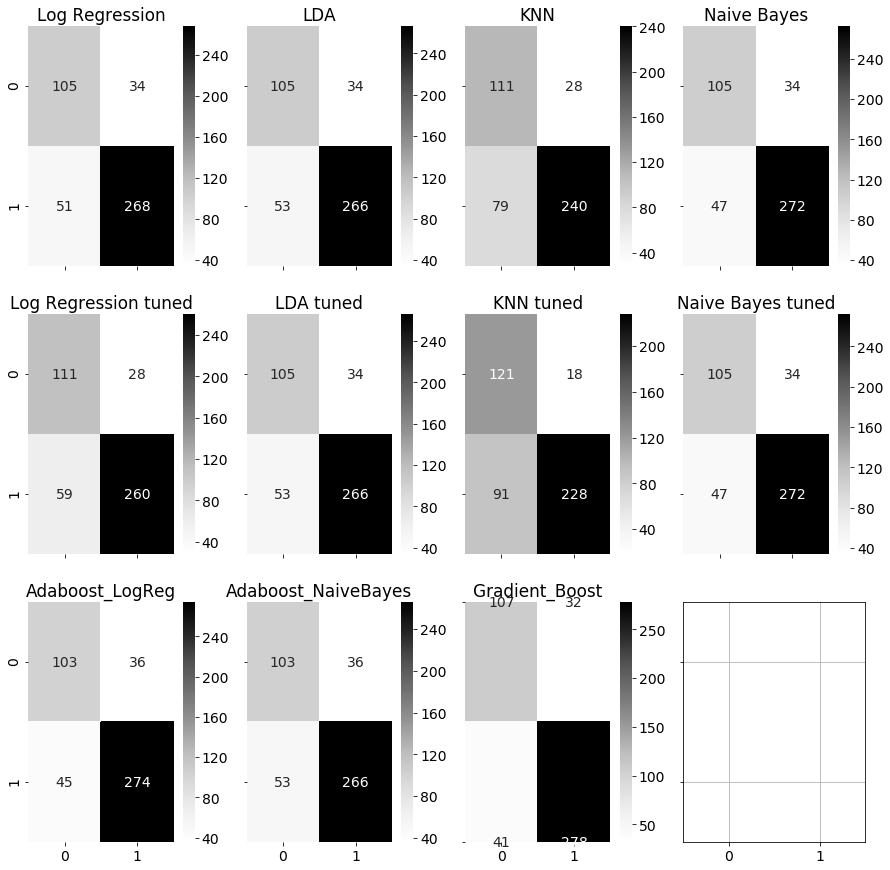

In [132]:
f,a =  plt.subplots(3,4,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,lr_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Log Regression');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,lda_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,knn_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('KNN');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,nb_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Naive Bayes');

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,lr_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][0]);
a[1][0].set_title('Log Regression tuned');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,lda_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][1]);
a[1][1].set_title('LDA tuned');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,knn_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][2]);
a[1][2].set_title('KNN tuned');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,nb_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][3]);
a[1][3].set_title('Naive Bayes tuned');

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,ada_lr_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][0]);
a[2][0].set_title('Adaboost_LogReg');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ada_nb_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][1]);
a[2][1].set_title('Adaboost_NaiveBayes');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,gbc_lr_test_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][2]);
a[2][2].set_title('Gradient_Boost');

### AUC and ROC

LogReg AUC: 0.87695


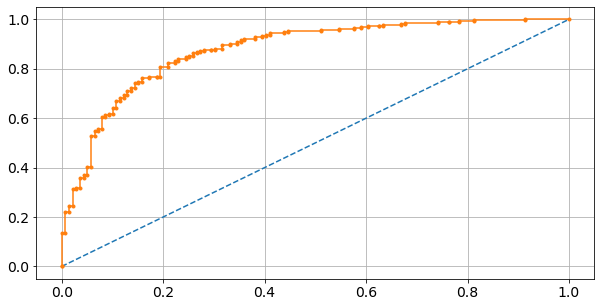

LDA AUC: 0.87722


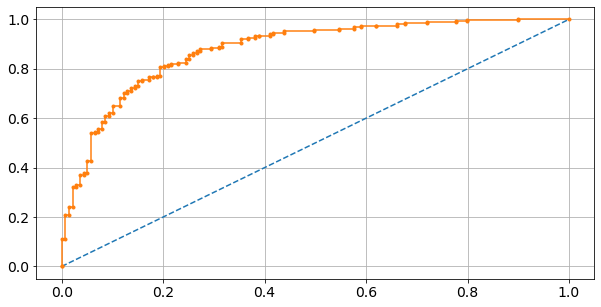

KNN AUC: 0.83008


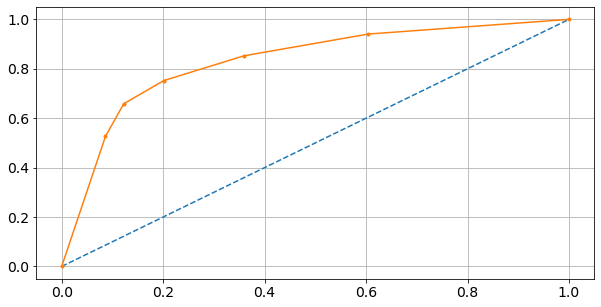

Naive_bayes AUC: 0.87598


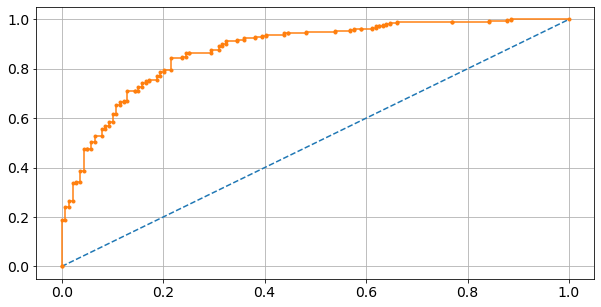

LogReg Tuned AUC: 0.87682


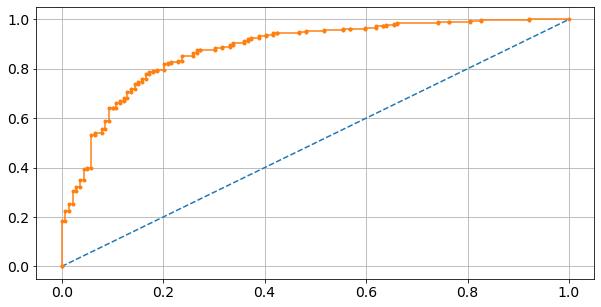

LDA Tuned AUC: 0.87722


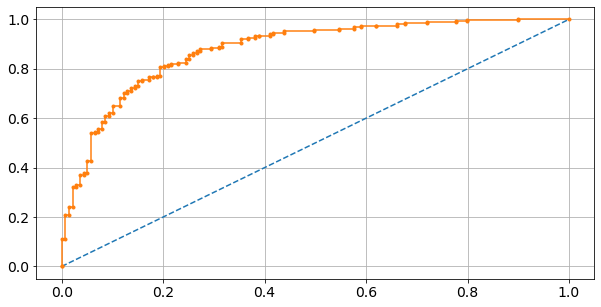

KNN tuned AUC: 0.84310


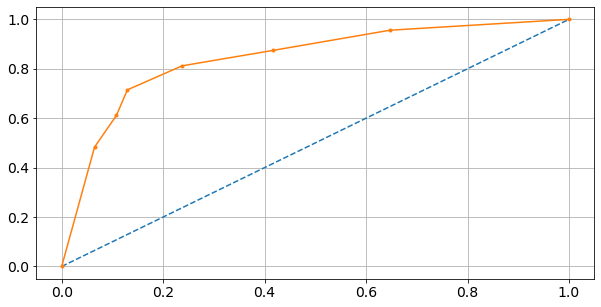

Naive_Bayes tuned AUC: 0.87598


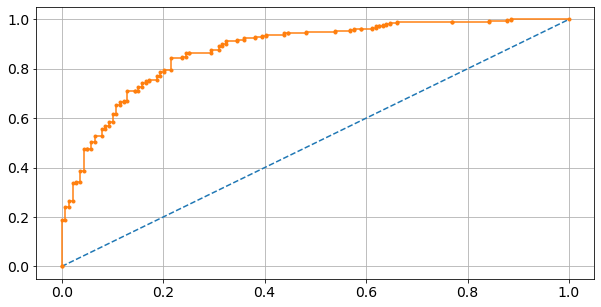

Log Reg Adaboosted AUC: 0.87662


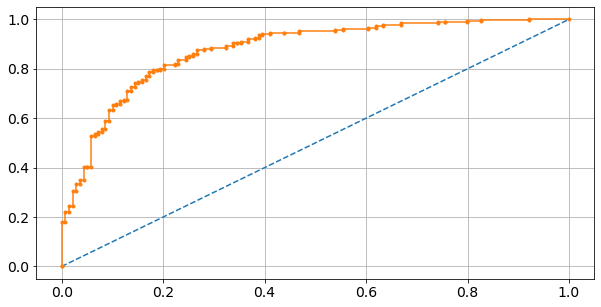

Naive_Bayes Adaboosted AUC: 0.87499


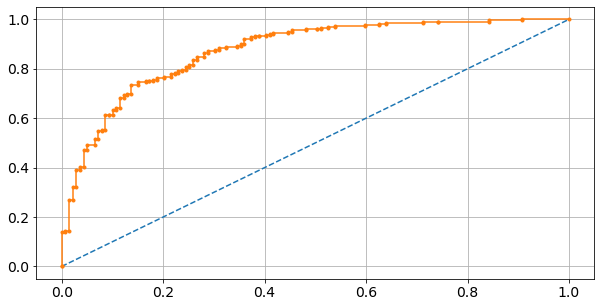

Gradient Boosting AUC: 0.89698


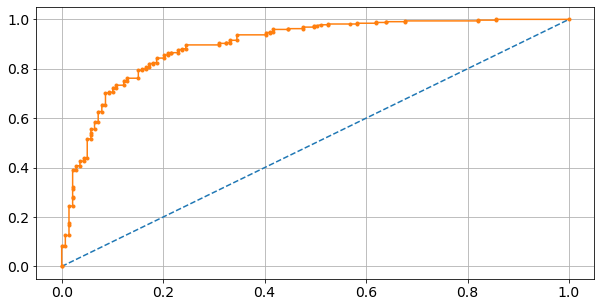

In [133]:
rcParams['figure.figsize'] = 10,5

# AUC and ROC for LR


# 
# calculate AUC
lr_auc = metrics.roc_auc_score(y_test,lr_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LogReg AUC: %.5f' % lr_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test,lr_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the LDA


# 
# calculate AUC
lda_auc = metrics.roc_auc_score(y_test,lda_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA AUC: %.5f' % lda_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lda_fpr, lda_tpr, thresholds = metrics.roc_curve(y_test,lda_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_fpr, lda_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the KNN


# calculating on the basis of a person not defaulting
# calculate AUC
knn_auc = metrics.roc_auc_score(y_test,knn_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('KNN AUC: %.5f' % knn_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test,knn_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_fpr, knn_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the NB


# calculating on the basis of a person not defaulting
# calculate AUC
nb_auc = metrics.roc_auc_score(y_test,nb_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Naive_bayes AUC: %.5f' % nb_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
nb_fpr, nb_tpr, thresholds = metrics.roc_curve(y_test,nb_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_fpr, nb_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the LR_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
lr_tuned_auc = metrics.roc_auc_score(y_test,lr_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LogReg Tuned AUC: %.5f' % lr_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lr_tuned_fpr, lr_tuned_tpr, thresholds = metrics.roc_curve(y_test,lr_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tuned_fpr, lr_tuned_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the LDA_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
lda_tuned_auc = metrics.roc_auc_score(y_test,lda_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Tuned AUC: %.5f' % lda_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lda_tuned_fpr, lda_tuned_tpr, thresholds = metrics.roc_curve(y_test,lda_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tuned_fpr, lda_tuned_tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the KNN_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
knn_tuned_auc = metrics.roc_auc_score(y_test,knn_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('KNN tuned AUC: %.5f' % knn_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
knn_tuned_fpr, knn_tuned_tpr, thresholds = metrics.roc_curve(y_test,knn_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tuned_fpr, knn_tuned_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the NB_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
nb_tuned_auc = metrics.roc_auc_score(y_test,nb_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Naive_Bayes tuned AUC: %.5f' % nb_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
nb_tuned_fpr, nb_tuned_tpr, thresholds = metrics.roc_curve(y_test,nb_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_tuned_fpr, nb_tuned_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the ADABoost LR


# calculating on the basis of a person not defaulting
# calculate AUC
ada_lr_auc = metrics.roc_auc_score(y_test,ada_lr_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Log Reg Adaboosted AUC: %.5f' % ada_lr_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
ada_lr_fpr, ada_lr_tpr, thresholds = metrics.roc_curve(y_test,ada_lr_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_lr_fpr, ada_lr_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the ADABoost NB


# calculating on the basis of a person not defaulting
# calculate AUC
ada_nb_auc = metrics.roc_auc_score(y_test,ada_nb_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Naive_Bayes Adaboosted AUC: %.5f' % ada_nb_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
ada_nb_fpr, ada_nb_tpr, thresholds = metrics.roc_curve(y_test,ada_nb_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_nb_fpr, ada_nb_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the Gradient Boosting


# calculating on the basis of a person not defaulting
# calculate AUC
gbc_auc = metrics.roc_auc_score(y_test,gbc_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Gradient Boosting AUC: %.5f' % gbc_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
gbc_fpr, gbc_tpr, thresholds = metrics.roc_curve(y_test,gbc_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbc_fpr, gbc_tpr, marker='.')
# show the plot
plt.show()

In [134]:
#Results after SMOTE

In [135]:
# defining list of models
models = [lr,lda,knn,nb,lr_tuned,lda_tuned,knn_tuned,nb_tuned,ada_lr,ada_nb,ada_rf,gbc]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    model.fit(X_train_sm,Y_train_sm)
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
   

In [136]:
acc_train

[0.82, 0.82, 0.85, 0.81, 0.8, 0.82, 0.81, 0.81, 0.82, 0.82, 0.88]

In [137]:
comparison_frame = pd.DataFrame({'Model':['logistic regression','Linear Discriminant Analysis','K-nearest neighbor','Naive-Bayes', 
                                          'LogReg_tuned','LDA_tuned','KNN_tuned','Naivebayes_tuned',
                                          'Adaboosting_LogReg','Adaboosting_NaiveBayes','Adaboosting_RandomForest','Gradient Boosting '], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,logistic regression,0.82,0.81,0.82,0.84,0.92,0.89
1,Linear Discriminant Analysis,0.82,0.81,0.82,0.83,0.92,0.89
2,K-nearest neighbor,0.85,0.77,0.83,0.75,0.96,0.90
3,Naive-Bayes,0.81,0.82,0.81,0.85,0.91,0.89
4,LogReg_tuned,0.80,0.81,0.78,0.82,0.92,0.90
5,LDA_tuned,0.82,0.81,0.82,0.83,0.92,0.89
6,KNN_tuned,0.81,0.76,0.76,0.71,0.96,0.93
7,Naivebayes_tuned,0.81,0.82,0.81,0.85,0.91,0.89
8,Adaboosting_LogReg,0.82,0.82,0.82,0.86,0.92,0.88
9,Adaboosting_NaiveBayes,0.82,0.81,0.82,0.83,0.91,0.88


### Confusion Matrix

In [169]:
## For test data
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

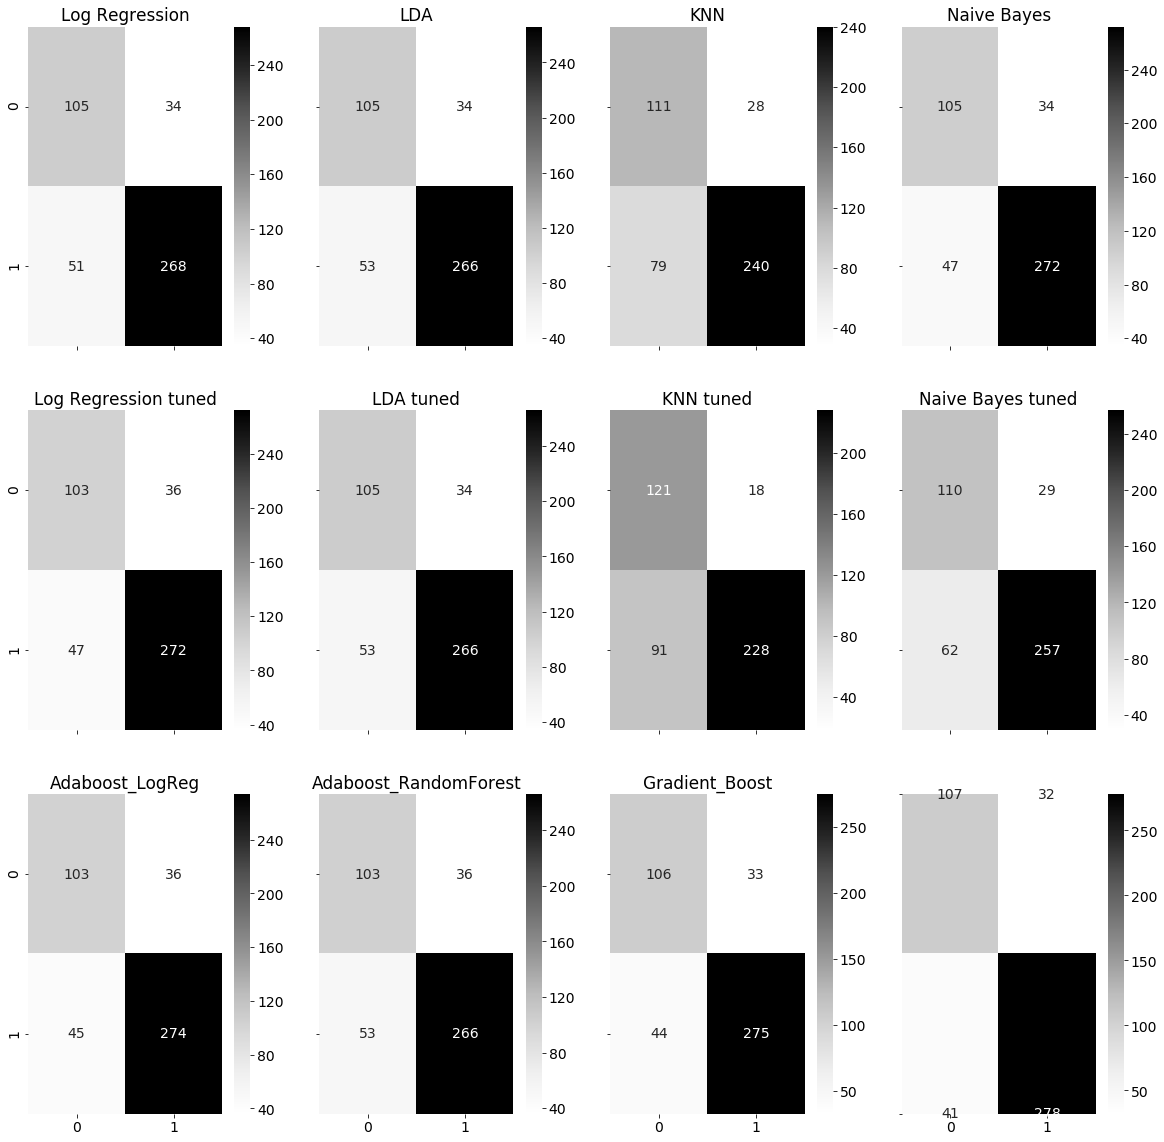

In [170]:
f,a =  plt.subplots(3,4,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,lr_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Log Regression');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,lda_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,knn_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('KNN');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,nb_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][3]);
a[0][3].set_title('Naive Bayes');

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,lr_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][0]);
a[1][0].set_title('Log Regression tuned');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,lda_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][1]);
a[1][1].set_title('LDA tuned');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,knn_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][2]);
a[1][2].set_title('KNN tuned');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,nb_tuned_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][3]);
a[1][3].set_title('Naive Bayes tuned');

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,ada_lr_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][0]);
a[2][0].set_title('Adaboost_LogReg');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ada_nb_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][1]);
a[2][1].set_title('Adaboost_NaiveBayes');

plot_0 = sns.heatmap((metrics.confusion_matrix(y_test,ada_rf_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][2]);
a[2][2].set_title('Adaboost_RandomForest');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,gbc_lr_test_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[2][3]);
a[2][2].set_title('Gradient_Boost');

### AUC and ROC

LogReg AUC: 0.87695


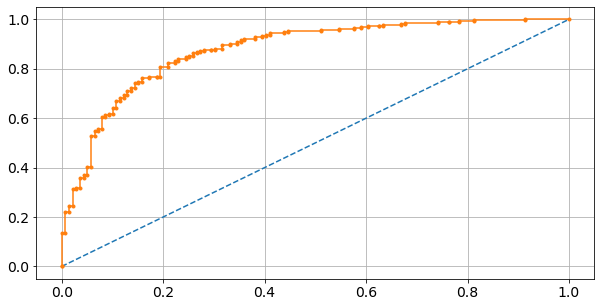

LDA AUC: 0.87722


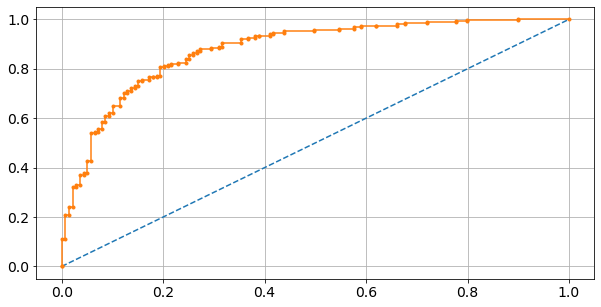

KNN AUC: 0.83008


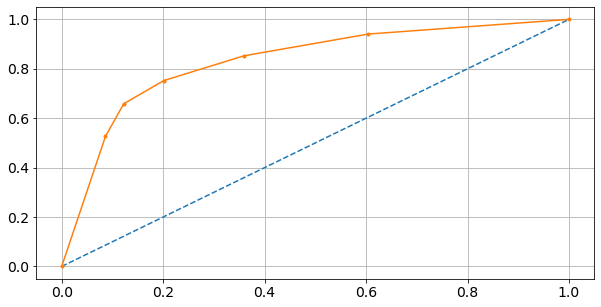

Naive_bayes AUC: 0.87598


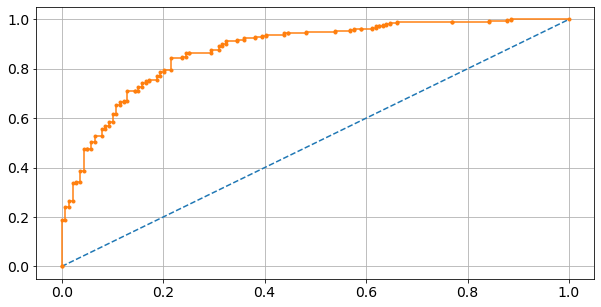

LogReg Tuned AUC: 0.87682


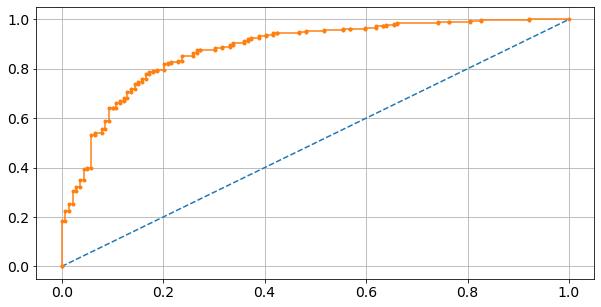

LDA Tuned AUC: 0.87722


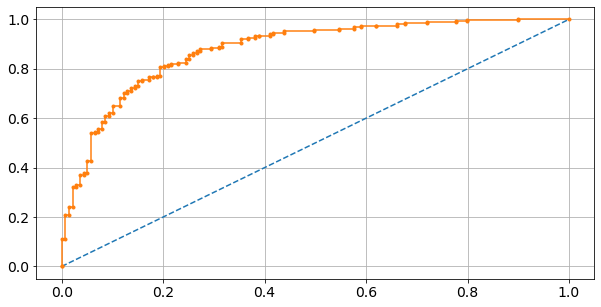

KNN tuned AUC: 0.84310


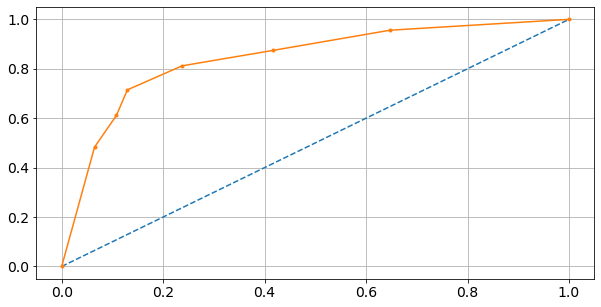

Naive_Bayes tuned AUC: 0.87598


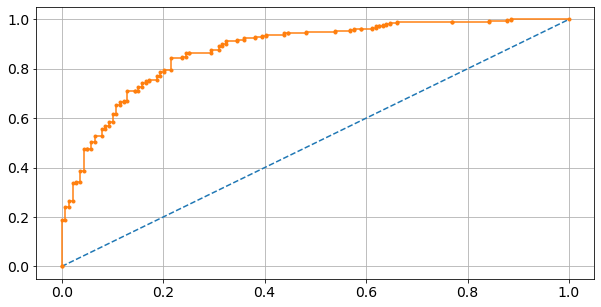

Log Reg Adaboosted AUC: 0.87662


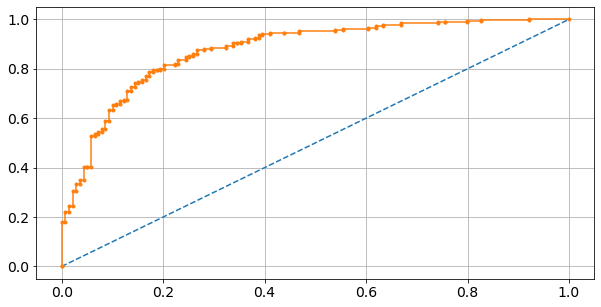

Naive_Bayes Adaboosted AUC: 0.87499


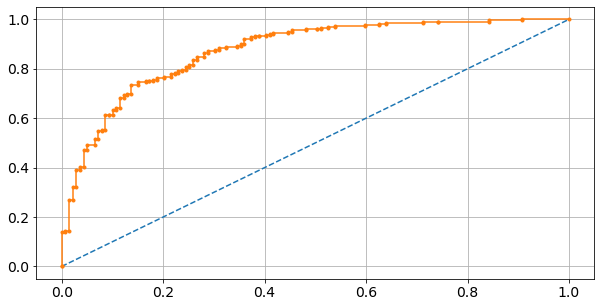

Gradient Boosting AUC: 0.89698


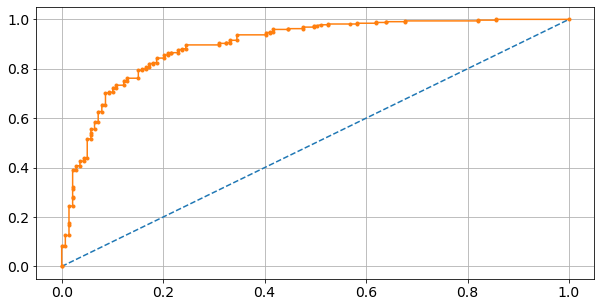

In [140]:
rcParams['figure.figsize'] = 10,5

# AUC and ROC for LR


# 
# calculate AUC
lr_auc = metrics.roc_auc_score(y_test,lr_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LogReg AUC: %.5f' % lr_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test,lr_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the LDA


# 
# calculate AUC
lda_auc = metrics.roc_auc_score(y_test,lda_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA AUC: %.5f' % lda_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lda_fpr, lda_tpr, thresholds = metrics.roc_curve(y_test,lda_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_fpr, lda_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the KNN


# calculating on the basis of a person not defaulting
# calculate AUC
knn_auc = metrics.roc_auc_score(y_test,knn_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('KNN AUC: %.5f' % knn_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test,knn_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_fpr, knn_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the NB


# calculating on the basis of a person not defaulting
# calculate AUC
nb_auc = metrics.roc_auc_score(y_test,nb_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Naive_bayes AUC: %.5f' % nb_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
nb_fpr, nb_tpr, thresholds = metrics.roc_curve(y_test,nb_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_fpr, nb_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the LR_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
lr_tuned_auc = metrics.roc_auc_score(y_test,lr_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LogReg Tuned AUC: %.5f' % lr_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lr_tuned_fpr, lr_tuned_tpr, thresholds = metrics.roc_curve(y_test,lr_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tuned_fpr, lr_tuned_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the LDA_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
lda_tuned_auc = metrics.roc_auc_score(y_test,lda_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Tuned AUC: %.5f' % lda_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
lda_tuned_fpr, lda_tuned_tpr, thresholds = metrics.roc_curve(y_test,lda_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tuned_fpr, lda_tuned_tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the KNN_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
knn_tuned_auc = metrics.roc_auc_score(y_test,knn_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('KNN tuned AUC: %.5f' % knn_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
knn_tuned_fpr, knn_tuned_tpr, thresholds = metrics.roc_curve(y_test,knn_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tuned_fpr, knn_tuned_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the NB_tuned


# calculating on the basis of a person not defaulting
# calculate AUC
nb_tuned_auc = metrics.roc_auc_score(y_test,nb_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Naive_Bayes tuned AUC: %.5f' % nb_tuned_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
nb_tuned_fpr, nb_tuned_tpr, thresholds = metrics.roc_curve(y_test,nb_tuned_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_tuned_fpr, nb_tuned_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the ADABoost LR


# calculating on the basis of a person not defaulting
# calculate AUC
ada_lr_auc = metrics.roc_auc_score(y_test,ada_lr_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Log Reg Adaboosted AUC: %.5f' % ada_lr_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
ada_lr_fpr, ada_lr_tpr, thresholds = metrics.roc_curve(y_test,ada_lr_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_lr_fpr, ada_lr_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the ADABoost NB


# calculating on the basis of a person not defaulting
# calculate AUC
ada_nb_auc = metrics.roc_auc_score(y_test,ada_nb_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Naive_Bayes Adaboosted AUC: %.5f' % ada_nb_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
ada_nb_fpr, ada_nb_tpr, thresholds = metrics.roc_curve(y_test,ada_nb_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_nb_fpr, ada_nb_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the ADABoost RF


# calculating on the basis of a person not defaulting
# calculate AUC
ada_rf_auc = metrics.roc_auc_score(y_test,ada_rf_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Naive_Bayes Adaboosted AUC: %.5f' % ada_nb_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
ada_rf_fpr, ada_rf_tpr, thresholds = metrics.roc_curve(y_test,ada_rf_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_rf_fpr, ada_rf_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the Gradient Boosting


# calculating on the basis of a person not defaulting
# calculate AUC
gbc_auc = metrics.roc_auc_score(y_test,gbc_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Gradient Boosting AUC: %.5f' % gbc_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
gbc_fpr, gbc_tpr, thresholds = metrics.roc_curve(y_test,gbc_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbc_fpr, gbc_tpr, marker='.')
# show the plot
plt.show()